In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import csv 
from sklearn.cluster import KMeans


# Data Import

In [2]:
df = pd.read_csv(r"C:\\Users\Chennaf\Documents\any.csv" , delimiter =';')

In [3]:
df

,Name,AGnostic/Specific-NN,Data Type,Examples,Global/Local,Features,Explanaition Scope,Explanation Output,Year
0,Concept Activation Vectors,NN,IMG,analyst/medical,Local,accuracy-robustness-expressivity,Local Explanation,Activation clusters,2018
1,Deep k-Nearest Neighbors,NN,IMG,MNIST,Local,robustness-detecting bias,Local Explanation,Activation clusters,2018
2,Generate Reviews,NN,TXT,Yes,Global,efficiency-scalability,Feature relevance explanation,Activation Maximization,2017
3,IP,NN,Tab,Yes,Global,generality-scalability-robustness,Feature relevance explanation,Activation Maximization,2017
4,Semantic Information,NN,Video,Random,Local,expressivity,Feature relevance explanation,Caption generation,2017
...,...,...,...,...,...,...,...,...,...
61,Axiomatic Attribution,NN,Any,imageNet/medical,Global,accuracy-visualization,Feature relevance explanation,SA/Saliency,2017
62,Sensitivity Analysis,AG,Tab,Wine,Global/Local,NaN,Feature relevance explanation,SA/Saliency/,2011
63,Explain neural network classification,NN,Tab,voting/calls,Global,NaN,Feature relevance explanation,SA/Saliency/FI,2002
64,Real Time Image Saliency,AG,IMG,Yes,Global/Local,accuracy-scalability,Feature relevance explanation,Saliency,2017


# Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
Name                    66 non-null object
AGnostic/Specific-NN    66 non-null object
Data Type               66 non-null object
Examples                66 non-null object
Global/Local            66 non-null object
Features                53 non-null object
Explanaition Scope      66 non-null object
Explanation Output      66 non-null object
Year                    66 non-null int64
dtypes: int64(1), object(8)
memory usage: 4.8+ KB


In [5]:
#defining name as index
df = df.set_index("Name")
df.index.name

'Name'

In [6]:
# Drop useless column examples
df = df.drop('Examples', 1)
df = df.drop('Data Type', 1)
df = df.drop('Global/Local', 1)
df = df.drop('AGnostic/Specific-NN', 1)
df = df.drop('Explanaition Scope', 1)
df = df.drop('Year', 1)

# Passed a dictionary to astype() function  
df = df.astype({"Features":'category', "Explanation Output":'category'}) 

# rename columns
df.rename(columns={'Explanation Output':'Explanation_Output'}, inplace=True)

# dropping rows with Null values in them
df = df.dropna(how='any',axis=0) 

# Check the changes 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Concept Activation Vectors to Visualizing and understanding 
Data columns (total 2 columns):
Features              53 non-null category
Explanation_Output    53 non-null category
dtypes: category(2)
memory usage: 2.9+ KB


In [7]:
df

,Features,Explanation_Output
Name,,
Concept Activation Vectors,accuracy-robustness-expressivity,Activation clusters
Deep k-Nearest Neighbors,robustness-detecting bias,Activation clusters
Generate Reviews,efficiency-scalability,Activation Maximization
IP,generality-scalability-robustness,Activation Maximization
Semantic Information,expressivity,Caption generation
Rationalizing Neural Predictions,accuracy-visualization,Caption generation/Saliency
A Unified Approach,accuracy-scalability-consistency,Conditional/Dependence/Shapley plots
ICU Outcome Prediction,accuracy-scalability-fidelity-visualization-co...,Conditional/Dependence/Shapley plots
Visualizing the Feature Importance,comparative,Conditional/Dependence/Shapley plots


### Dealing with categorical features

In [8]:
for col in df.columns:
    print(col,':', len(df[col].unique()), 'labels')

Features : 44 labels
Explanation_Output : 18 labels


In [9]:
#splitting categories of Features and creating dummies and saving in dataframe spl3
spl3 = df.Features.str.split('-', expand=True).stack()
spl3 = pd.get_dummies(spl3, prefix='F').groupby(level=0).sum()
spl3

,F_accuracy,F_certainty factor,F_comparative,F_completeness,F_comprehensibility,F_concise,F_consistency,F_debugging,F_detecting bias,F_efficiency,...,F_monotonicity,F_novelty,F_objective,F_robustness,F_scalability,F_simplicity,F_soundnes,F_stability,F_usefulness,F_visualization
Name,,,,,,,,,,,,,,,,,,,,,
A Unified Approach,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Anchors,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Attribute Interactions in Datasets,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Axiomatic Attribution,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Boolean rule extraction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Concept Activation Vectors,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Decision tree induction,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Deep Taylor decomposition,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
Deep k-Nearest Neighbors,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
#splitting categories of Explanation_Output and creating dummies
spl4 = df.Explanation_Output.str.split('/', expand=True).stack()
spl4 = pd.get_dummies(spl4, prefix='Out').groupby(level=0).sum()
spl4

,Out_Activation Maximization,Out_Activation clusters,Out_Caption generation,Out_Conditional,Out_DR,Out_DT,Out_Dependence,Out_FI,Out_Influence functions,Out_Other,Out_PDP,Out_SA,Out_Saliency,Out_Shapley plots,Out_hidden layer visualization
Name,,,,,,,,,,,,,,,
A Unified Approach,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
Anchors,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Attribute Interactions in Datasets,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Axiomatic Attribution,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Boolean rule extraction,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Concept Activation Vectors,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Decision tree induction,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Deep Taylor decomposition,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Deep k-Nearest Neighbors,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Merging All
result = pd.concat([spl3, spl4], axis=1, sort=False)
merged = pd.concat([df, result], axis=1, sort=True)
merged = merged.drop(['Features'], axis='columns')
merged = merged.drop(['Explanation_Output'], axis='columns')
merged.to_csv("merged.csv", sep=';')
merged
#merged
#result

,F_accuracy,F_certainty factor,F_comparative,F_completeness,F_comprehensibility,F_concise,F_consistency,F_debugging,F_detecting bias,F_efficiency,...,Out_DT,Out_Dependence,Out_FI,Out_Influence functions,Out_Other,Out_PDP,Out_SA,Out_Saliency,Out_Shapley plots,Out_hidden layer visualization
A Unified Approach,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Anchors,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Attribute Interactions in Datasets,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Axiomatic Attribution,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Boolean rule extraction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Concept Activation Vectors,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Decision tree induction,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Deep Taylor decomposition,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Deep k-Nearest Neighbors,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Diagnosing Bias,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# returning one row
merged[merged.index.str.contains('Meaningful Perturbation',case=False)]

,F_accuracy,F_certainty factor,F_comparative,F_completeness,F_comprehensibility,F_concise,F_consistency,F_debugging,F_detecting bias,F_efficiency,...,Out_DT,Out_Dependence,Out_FI,Out_Influence functions,Out_Other,Out_PDP,Out_SA,Out_Saliency,Out_Shapley plots,Out_hidden layer visualization
Meaningful Perturbation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Sparse Matrix

In [13]:
# transforming dataframe to numpy array
A = merged.to_numpy()
print(A)

# dense to sparse
from numpy import array
from scipy.sparse import csr_matrix
from numpy import count_nonzero

# calculate sparsity
sparsity = 1.0 - count_nonzero(A) / A.size
print(sparsity)

# convert to sparse matrix (CSR method)
S = csr_matrix(merged)
print(S)

# reconstruct dense matrix to check correctness
B = S.todense()
print(B)

[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
0.912563276576162
  (0, 0)	1
  (0, 6)	1
  (0, 20)	1
  (0, 29)	1
  (0, 32)	1
  (0, 39)	1
  (1, 12)	1
  (1, 21)	1
  (1, 25)	1
  (1, 30)	1
  (2, 25)	1
  (2, 33)	1
  (3, 0)	1
  (3, 25)	1
  (3, 37)	1
  (3, 38)	1
  (4, 11)	1
  (4, 21)	1
  (4, 30)	1
  (5, 0)	1
  (5, 11)	1
  (5, 19)	1
  (5, 27)	1
  (6, 0)	1
  (6, 13)	1
  :	:
  (45, 30)	1
  (46, 0)	1
  (46, 12)	1
  (46, 31)	1
  (47, 11)	1
  (47, 19)	1
  (47, 35)	1
  (48, 0)	1
  (48, 12)	1
  (48, 15)	1
  (48, 25)	1
  (48, 36)	1
  (49, 25)	1
  (49, 38)	1
  (50, 2)	1
  (50, 29)	1
  (50, 32)	1
  (50, 39)	1
  (51, 9)	1
  (51, 20)	1
  (51, 35)	1
  (52, 0)	1
  (52, 25)	1
  (52, 30)	1
  (52, 33)	1
[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


# PCA

In [14]:
# Using PCA since most of the data is very high-dimensional
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(merged)

PCA(n_components=2)

In [15]:
X = pca.transform(merged)

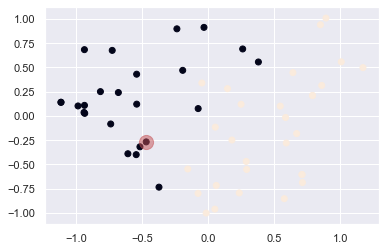

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=merged.F_accuracy)
plt.scatter([X[10][0]], [X[10][1]], s=[200], c=["r"], alpha=0.5)

# Clustering

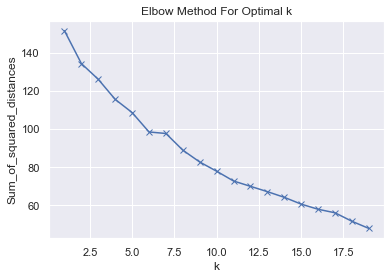

In [17]:
# reasons for choosing k-means: https://issuu.com/ijdmtaeditoriir/docs/_iir_ijdmta_16_35

# implementing Elbow method to optimize K
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(merged)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

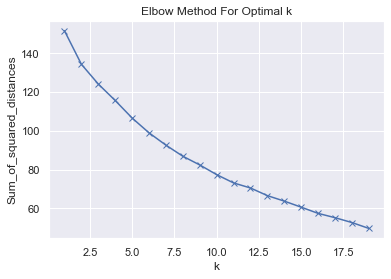

In [18]:
# implementing Elbow method to optimize K -- with optimized K-means parameters
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=600, random_state=42)
    km = km.fit(merged)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
# Executing K-means 
from sklearn.cluster import KMeans
k= 10
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=600, random_state=42)  # 10 clusters for 10 questions and maxIter default= 50
model = kmeans.fit(merged)
model

KMeans(max_iter=600, n_clusters=10, random_state=42)

In [20]:
e_dataframe = pd.DataFrame(model.labels_)
e_dataframe

,0
0,6
1,3
2,3
3,7
4,0
5,0
6,2
7,4
8,0
9,2


### Elbow + clustering on Sparse Matrix

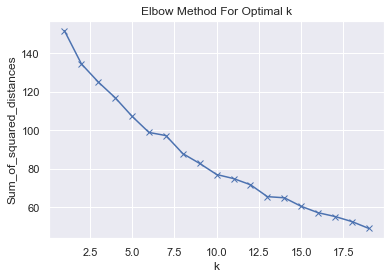

In [21]:
# reasons for choosing k-means: https://issuu.com/ijdmtaeditoriir/docs/_iir_ijdmta_16_35

# implementing Elbow method to optimize K
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(S.tocsr())
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

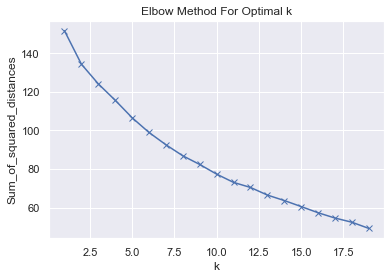

In [22]:
# implementing Elbow method to optimize K -- with optimized K-means parameters
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=600, random_state=42)
    km = km.fit(S.tocsr())
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
labeler = KMeans(n_clusters=10) 
# convert coo to csr format 
# note: Kmeans currently only works with CSR type sparse matrix 
labeler.fit(S.tocsr())  

# print cluster assignments for each row 
for (row, label) in enumerate(labeler.labels_):   
  print ("row %d has label %d"%(row, label))

row 0 has label 4
row 1 has label 1
row 2 has label 6
row 3 has label 0
row 4 has label 5
row 5 has label 7
row 6 has label 9
row 7 has label 6
row 8 has label 7
row 9 has label 2
row 10 has label 2
row 11 has label 8
row 12 has label 1
row 13 has label 1
row 14 has label 8
row 15 has label 1
row 16 has label 9
row 17 has label 6
row 18 has label 5
row 19 has label 3
row 20 has label 5
row 21 has label 4
row 22 has label 3
row 23 has label 1
row 24 has label 2
row 25 has label 1
row 26 has label 9
row 27 has label 2
row 28 has label 0
row 29 has label 1
row 30 has label 0
row 31 has label 6
row 32 has label 1
row 33 has label 8
row 34 has label 0
row 35 has label 6
row 36 has label 0
row 37 has label 0
row 38 has label 5
row 39 has label 1
row 40 has label 2
row 41 has label 2
row 42 has label 5
row 43 has label 8
row 44 has label 6
row 45 has label 5
row 46 has label 9
row 47 has label 7
row 48 has label 2
row 49 has label 0
row 50 has label 4
row 51 has label 3
row 52 has label 6


# Agglomerative Clustering

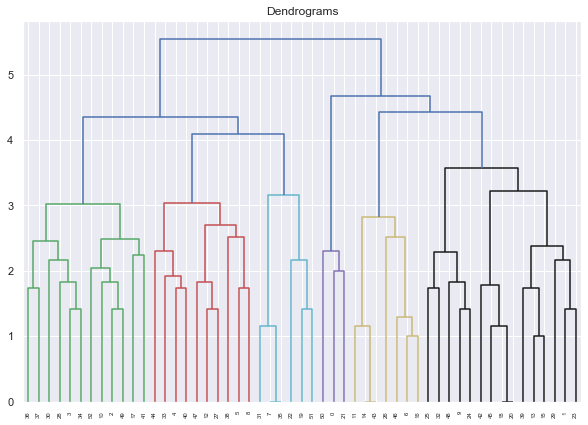

In [24]:
# draw the dendrogram to help us decide the number of clusters for this particular problem
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(merged, method='ward'))

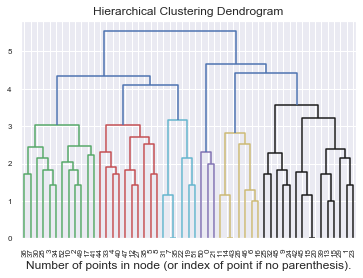

In [25]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
#model = AgglomerativeClustering(n_clusters=10, linkage='average', affinity='cosine')

model = model.fit(merged)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10)

plt.tick_params(axis='x', which='major', labelsize=8)
plt.tick_params(axis='y', which='major', labelsize=8)


plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, linkage='average', affinity='cosine')  
cluster.fit_predict(merged)
# print cluster assignments for each row 
for (row, label) in enumerate(cluster.labels_):   
  print ("row %d has label %d"%(row, label))

row 0 has label 5
row 1 has label 1
row 2 has label 0
row 3 has label 0
row 4 has label 1
row 5 has label 6
row 6 has label 3
row 7 has label 2
row 8 has label 6
row 9 has label 1
row 10 has label 0
row 11 has label 3
row 12 has label 1
row 13 has label 1
row 14 has label 3
row 15 has label 1
row 16 has label 3
row 17 has label 2
row 18 has label 1
row 19 has label 8
row 20 has label 1
row 21 has label 5
row 22 has label 8
row 23 has label 1
row 24 has label 1
row 25 has label 1
row 26 has label 3
row 27 has label 1
row 28 has label 3
row 29 has label 1
row 30 has label 0
row 31 has label 2
row 32 has label 1
row 33 has label 3
row 34 has label 0
row 35 has label 2
row 36 has label 0
row 37 has label 0
row 38 has label 9
row 39 has label 1
row 40 has label 4
row 41 has label 7
row 42 has label 1
row 43 has label 3
row 44 has label 4
row 45 has label 1
row 46 has label 3
row 47 has label 6
row 48 has label 1
row 49 has label 0
row 50 has label 5
row 51 has label 8
row 52 has label 0


In [27]:
e_dataframe = pd.DataFrame(cluster.labels_)
e_dataframe

,0
0,5
1,1
2,0
3,0
4,1
5,6
6,3
7,2
8,6
9,1


In [29]:
# Adding cluster label to dataframe
labeled = merged.copy()
labeled['Cluster Class'] = pd.Series(cluster.labels_, index=labeled.index)
# ordering by cluster number
labeled = labeled.sort_values(by ='Cluster Class' )
# saving files
labeled.to_excel("labeled.xlsx") 
labeled.to_csv("labeled.csv", encoding='utf-8', index=True)
labeled

,F_accuracy,F_certainty factor,F_comparative,F_completeness,F_comprehensibility,F_concise,F_consistency,F_debugging,F_detecting bias,F_efficiency,...,Out_Dependence,Out_FI,Out_Influence functions,Out_Other,Out_PDP,Out_SA,Out_Saliency,Out_Shapley plots,Out_hidden layer visualization,Cluster Class
Why should I trust you?(LIME),1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Meaningful Perturbation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Attribute Interactions in Datasets,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Axiomatic Attribution,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Visualizing and understanding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Quantitative input influence,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Real Time Image Saliency,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Rationalizing Neural Predictions,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Discovering additive structure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Genetic programming,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
